In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
# Define file
dataset_zip = 'creditcardfraud.zip'
dataset_csv = 'creditcard.csv'

# Download and unzip dataset if not present
if not os.path.exists(dataset_csv):
    if not os.path.exists(dataset_zip):
        !kaggle datasets download -d mlg-ulb/creditcardfraud
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall()
print("Dataset ready:", dataset_csv)


Dataset ready: creditcard.csv


In [3]:
# Load dataset into a DataFrame
df = pd.read_csv(dataset_csv)


In [4]:
# Display dataset shape
print("Shape:", df.shape)

Shape: (284807, 31)


In [5]:
#info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#summary statistics
print(df.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


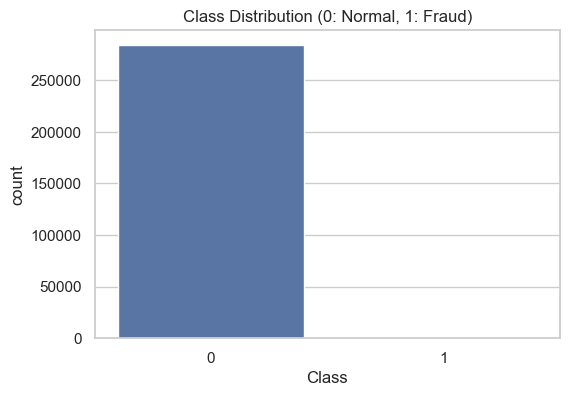

In [7]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()


Number of Normal Transactions (Class=0): 284315
Number of Fraudulent Transactions (Class=1): 492


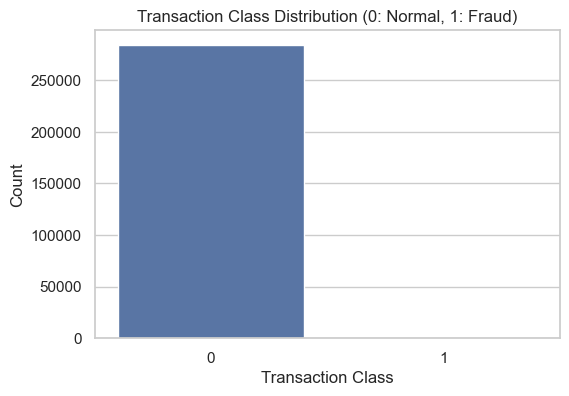

Sample Fraud Cases:
        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.3201

In [8]:
# Count the number of normal and fraudulent transactions
normal_count = df[df['Class'] == 0].shape[0]
fraud_count = df[df['Class'] == 1].shape[0]

print("Number of Normal Transactions (Class=0):", normal_count)
print("Number of Fraudulent Transactions (Class=1):", fraud_count)

# Plot the distribution of the 'Class' variable
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Transaction Class Distribution (0: Normal, 1: Fraud)')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

# Display a few sample fraud cases for inspection
print("Sample Fraud Cases:")
print(df[df['Class'] == 1].head())


In [9]:
# Grouped statistics by target class
print("Stats by Class:\n", df.groupby('Class').describe())

Stats by Class:
            Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      28431

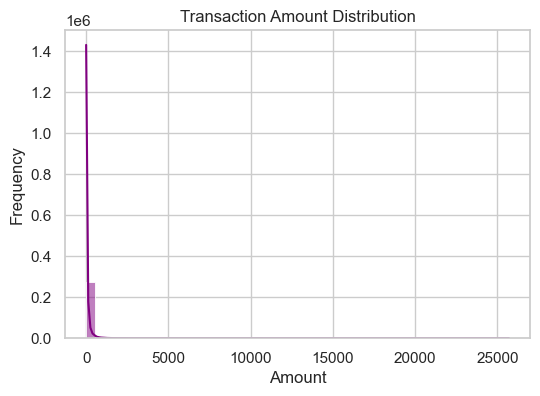

In [10]:
# Histogram for 'Amount'
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=50, kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


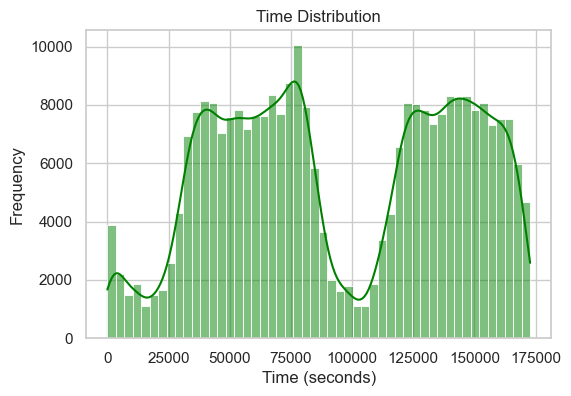

In [11]:
# Histogram for 'Time'
plt.figure(figsize=(6,4))
sns.histplot(df['Time'], bins=50, kde=True, color='green')
plt.title('Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


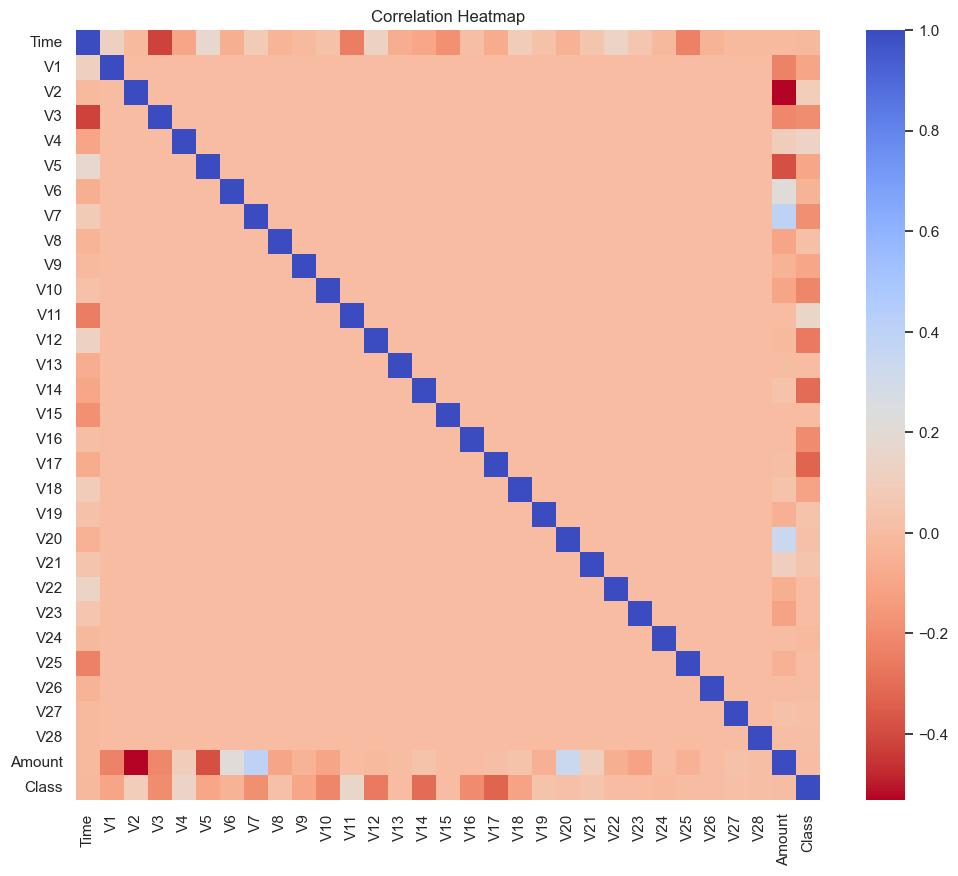

In [12]:
# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=False)
plt.title('Correlation Heatmap')
plt.show()

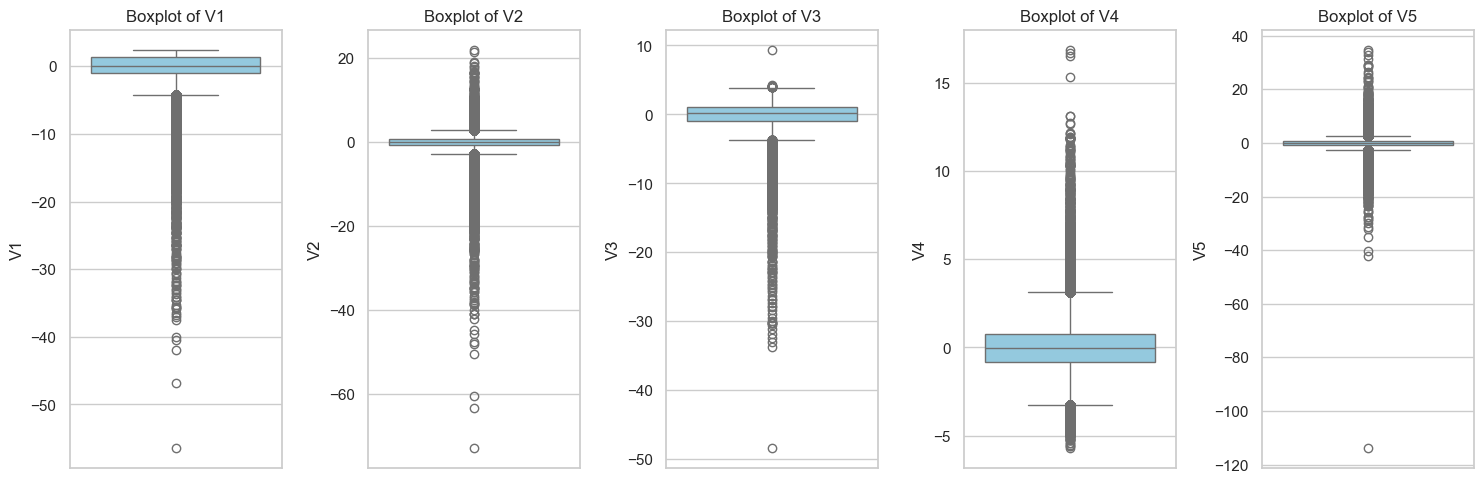

In [13]:
# Boxplots for features V1 to V5
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15,5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


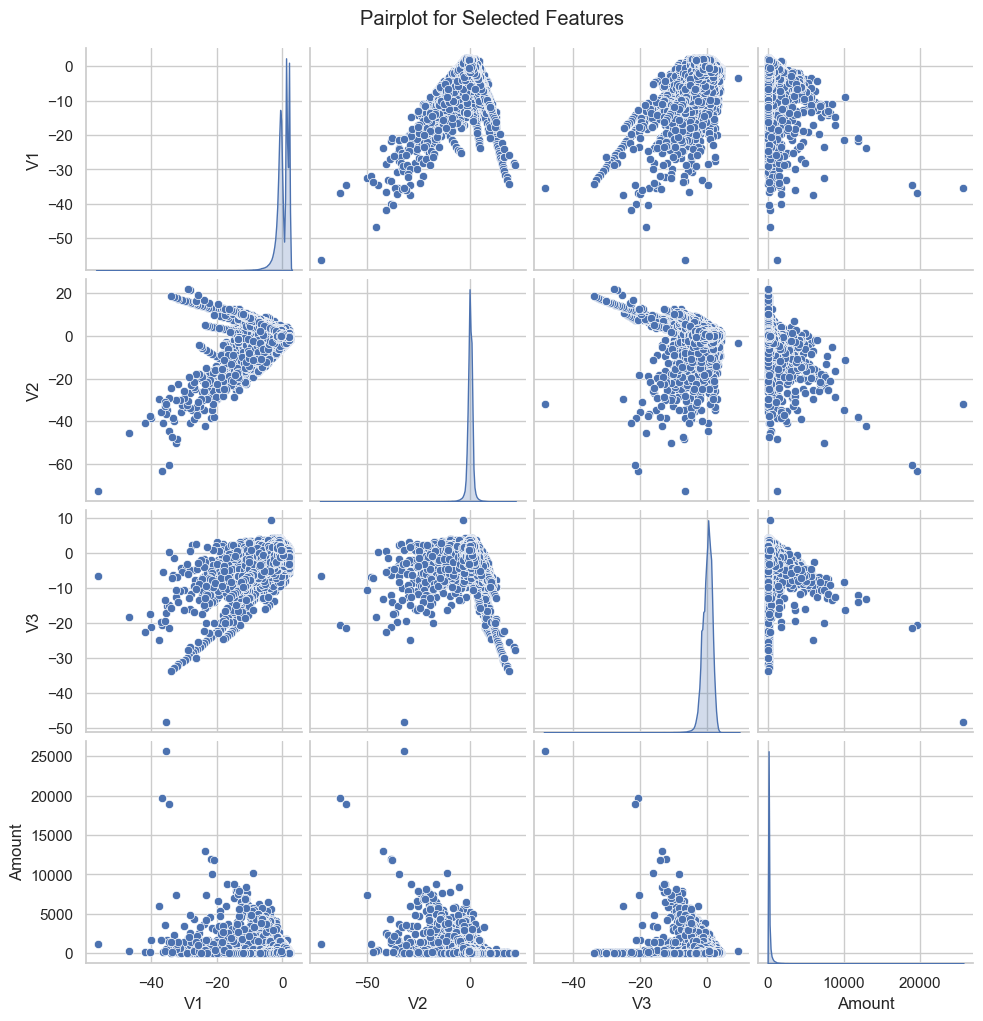

In [14]:
# Pairplot for a subset of features (using 'Amount' if 'Scaled_Amount' is not yet available)
subset = ['V1', 'V2', 'V3', 'Scaled_Amount'] if 'Scaled_Amount' in df.columns else ['V1', 'V2', 'V3', 'Amount']
sns.pairplot(df[subset], diag_kind='kde')
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()


In [15]:
#MACHINE LEARNING ALGO- RANDOMCLASSIFIER
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier


In [16]:
# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Drop original columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)
print("Columns after preprocessing:", df.columns.tolist())


Columns after preprocessing: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Scaled_Amount', 'Scaled_Time']


In [17]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Stratified split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (199364, 30) Test shape: (85443, 30)


In [18]:
# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("Model training complete.")


Model training complete.


In [19]:
# Predict on test set and print evaluation metrics
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print("ROC AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85289     6]
 [   36   112]]
ROC AUC Score: 0.9373928005031822


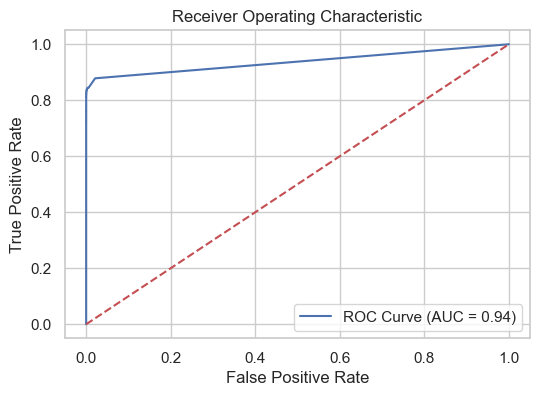

In [20]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [21]:
# Make predictions on a sample of test data
X_sample = X_test.head(10)
sample_preds = clf.predict(X_sample)
print("Sample Predictions:", sample_preds)


Sample Predictions: [0 0 0 0 0 0 0 0 0 0]
